L'objectif de ce notebook est d'entrainer une IA pour faire de la prédiction sur nos données. Dans notre cas les attaques terroristes.

In [2]:
# Imports pour le train et le test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Charger le fichier CSV
data = pd.read_csv("Trait2.csv", sep=",",low_memory=False)

# Remplacer les valeurs manquantes
data.fillna(0, inplace=True)

# Convertir les colonnes catégorielles en valeurs numériques avec le label encodin

for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
colonnes_X = ['iyear', 'imonth', 'iday', 'extended', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'nperps', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt']
colonnes_y = ['nkill', 'nwound']

data_X = data[colonnes_X].copy()
data_y = data[colonnes_y]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_features="log2", max_depth=None)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

from sklearn.model_selection import RandomizedSearchCV

# Grille des hyperparamètres à explorer
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# Initialiser le modèle de forêt aléatoire
# rf = RandomForestRegressor(random_state=42)

# # Utiliser RandomizedSearchCV pour rechercher les meilleurs hyperparamètres
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Adapter la recherche aléatoire aux données d'entraînement
# random_search.fit(X_train, y_train)

# # Afficher les meilleurs hyperparamètres trouvés
# print("Best hyperparameters found: ", random_search.best_params_)

# # Utiliser le meilleur modèle trouvé pour effectuer des prédictions
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_test)



Mean Squared Error: 967.0554725582747
Mean Absolute Error: 9.36608655661404
R-squared: 0.2672671623124552
Root Mean Squared Error: 31.097515536747864
Mean Absolute Percentage Error: nkill     1.738268e+12
nwound    3.028951e+12
dtype: float64


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\diasa\AppData\Local\Temp\ipykernel_12344\2756094573.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


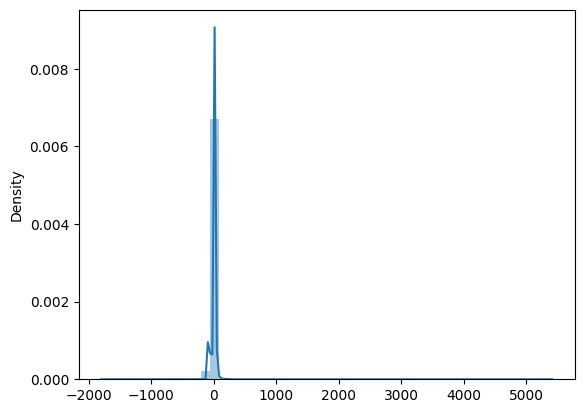

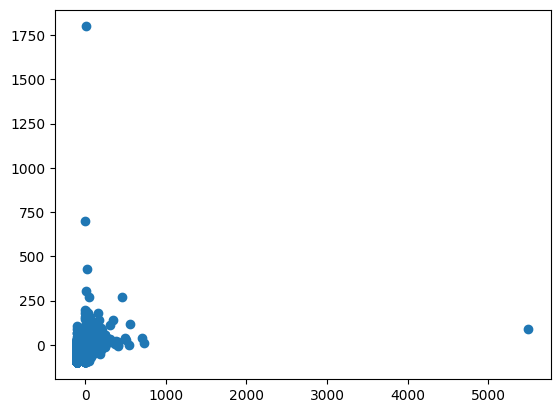

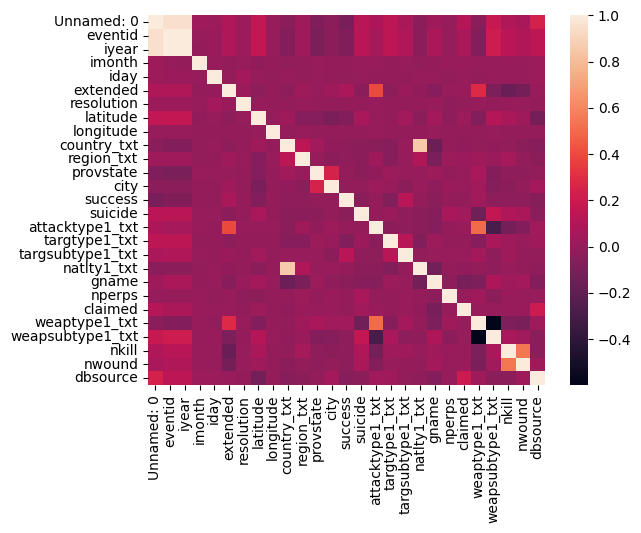

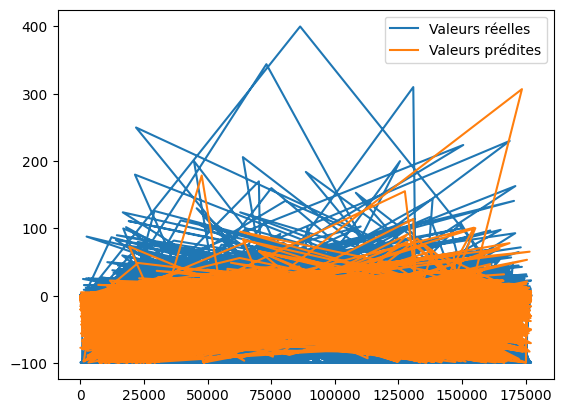

Précision des prédictions pour 'nkill' (seuil = 10%): 9.04%
Précision des prédictions pour 'nwound' (seuil = 10%): 7.21%
Précision: 26.72671623124552 %


In [4]:

# Test et graphs.
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error:", mape)

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique de distribution des erreurs
sns.distplot(y_test - y_pred)
plt.show()

# Graphique de dispersion des erreurs
plt.scatter(y_test, y_pred)
plt.show()
#heatmap
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



# Graphique de prédiction (par exemple pour 'nkill')
plt.plot(y_test.index, y_test['nkill'], label='Valeurs réelles')
plt.plot(y_test.index, y_pred[:, 0], label='Valeurs prédites')  # Colonne 0 pour 'nkill'
plt.legend()
plt.show()

# Définir un seuil d'erreur acceptable (en pourcentage)
seuil_erreur = 10

# Calculer l'erreur relative pour chaque prédiction
erreurs_relatives = np.abs((y_test - y_pred) / (y_test + 1e-10)) * 100

# Calculer la proportion de prédictions dont l'erreur relative est inférieure au seuil
precision_nkill = np.sum(erreurs_relatives['nkill'] <= seuil_erreur) / len(erreurs_relatives['nkill']) * 100
precision_nwound = np.sum(erreurs_relatives['nwound'] <= seuil_erreur) / len(erreurs_relatives['nwound']) * 100

print(f"Précision des prédictions pour 'nkill' (seuil = {seuil_erreur}%): {precision_nkill:.2f}%") 
print(f"Précision des prédictions pour 'nwound' (seuil = {seuil_erreur}%): {precision_nwound:.2f}%")

# Calculer la précision du modèle en pourcentage
precision = rf.score(X_test, y_test) * 100
print("Précision:", precision, "%")


In [5]:
#Régression logistique pour prédire le pays dans lequel l'attaque a eu lieu
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)

X= data.drop(['country_txt'], axis=1)
y= data['country_txt']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prédictions
y_pred = lr.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Rapport de classification
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Test et graphs.
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

Accuracy: 0.136590735879414
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2477
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00       538
           3       0.00      0.00      0.00        90
           5       0.00      0.00      0.00       159
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        47
          12       0.00      0.00      0.00       302
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         

c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

Mean Squared Error: 171.83150437193456
Mean Absolute Error: 4.839687551903453
R-squared: 0.04499693567432478
Root Mean Squared Error: 13.108451638997435


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


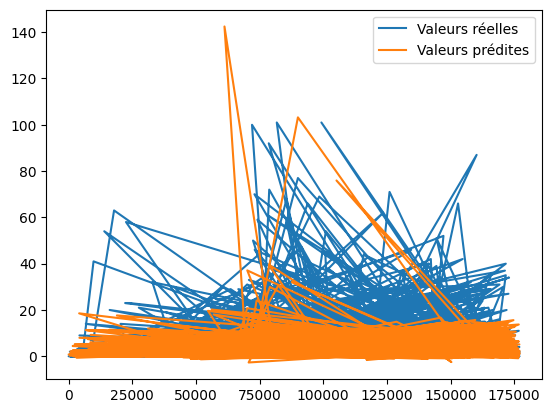

Précision des prédictions pour 'nkill' (seuil = 10%): 5.01%
Précision des prédictions pour 'nwound' (seuil = 10%): 2.30%
Précision: 4.499693567432478 %


In [15]:
# Nouvelle approche, avec sélection de variables, puis réseau de neurones pour la prédiction du nombre de victimes (nkill et nwound)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MultiLabelBinarizer
# Sélectionner les colonnes pour l'entrée (X) et la sortie (y), en évitant les données négatives dans X
data_pos= data[data >= 0].dropna()
X = data_pos.drop(['nkill', 'nwound'], axis=1)
# Get the target variables
y = data_pos[['nkill', 'nwound']]

# Use MultiLabelBinarizer to binarize the target variables
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(y.values)

# Use SelectKBest to select the best features
X_new = SelectKBest(chi2, k=10).fit_transform(X, y_binarized)

# Normaliser les données
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_new)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entraîner le réseau de neurones
mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

# Prédictions
y_pred = mlp.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

# Graphique de prédiction (par exemple pour 'nkill')
plt.plot(y_test.index, y_test['nkill'], label='Valeurs réelles')
plt.plot(y_test.index, y_pred[:, 0], label='Valeurs prédites')  # Colonne 0 pour 'nkill'
plt.legend()
plt.show()

# Définir un seuil d'erreur acceptable (en pourcentage)
seuil_erreur = 10

# Calculer l'erreur relative pour chaque prédiction
erreurs_relatives = np.abs((y_test - y_pred) / (y_test + 1e-10)) * 100

# Calculer la proportion de prédictions dont l'erreur relative est inférieure au seuil
precision_nkill = np.sum(erreurs_relatives['nkill'] <= seuil_erreur) / len(erreurs_relatives['nkill']) * 100
precision_nwound = np.sum(erreurs_relatives['nwound'] <= seuil_erreur) / len(erreurs_relatives['nwound']) * 100

print(f"Précision des prédictions pour 'nkill' (seuil = {seuil_erreur}%): {precision_nkill:.2f}%")
print(f"Précision des prédictions pour 'nwound' (seuil = {seuil_erreur}%): {precision_nwound:.2f}%")

# Calculer la précision du modèle en pourcentage
precision = mlp.score(X_test, y_test) * 100
print("Précision:", precision, "%")
